# **Project Name   - Cornavirus Tweet Sentiment Analysis**(Classification)  



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 - $\color{orange}{\text{Pratik Kanjilal}}$**


# **Project Summary -**

I followed the steps below:

* Understanding the Data and Problem related to it.
* Loading the data into a pandas dataframe and having a first look at it.
* Looking for Missing Values and handling them.
* NLP text preprocessing.
* Vectorizations and fitting into different models each vectorizer respectively.
* Selecting the best model.
* Coming to Conclusion

# **GitHub Link -**

https://github.com/Pratik23-pk/covid19_tweet_sentiment_analysis

# **Problem Statement**


**This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets. The tweets have been pulled from X(Twitter) and manual tagging has been done then. The names and usernames have been given codes to avoid any privacy concerns**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

# Sklearn Libraries
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AlmaBetter Datascience/Datasets/Coronavirus Tweets.csv', encoding = "ISO-8859-1", engine='python')

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
data.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(41157, 6)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# Checking the % of Null values and duplicate values if any
print(data.isnull().sum()/len(data)*100)


UserName          0.000000
ScreenName        0.000000
Location         20.871298
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64


<Axes: >

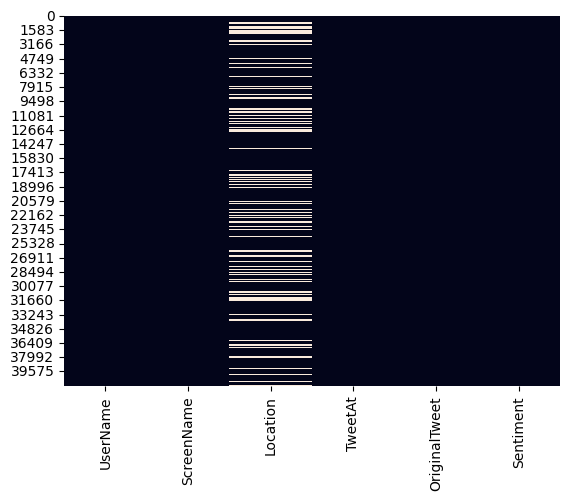

In [ ]:
# Visualizing the missing values
sns.heatmap(data.isnull(), cbar=False)

We see that the location column has more than 20% of null values

**Handling missing values**

In [ ]:
data['Location'].fillna('unknown', inplace=True)

In [ ]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,unknown,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,unknown,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
location_top10 = data['Location'].value_counts().sort_values(ascending=False)[:10]
location_top10

unknown            8590
London              540
United States       528
London, England     520
New York, NY        395
Washington, DC      373
United Kingdom      337
Los Angeles, CA     281
India               268
UK                  232
Name: Location, dtype: int64

<Axes: xlabel='Location', ylabel='count'>

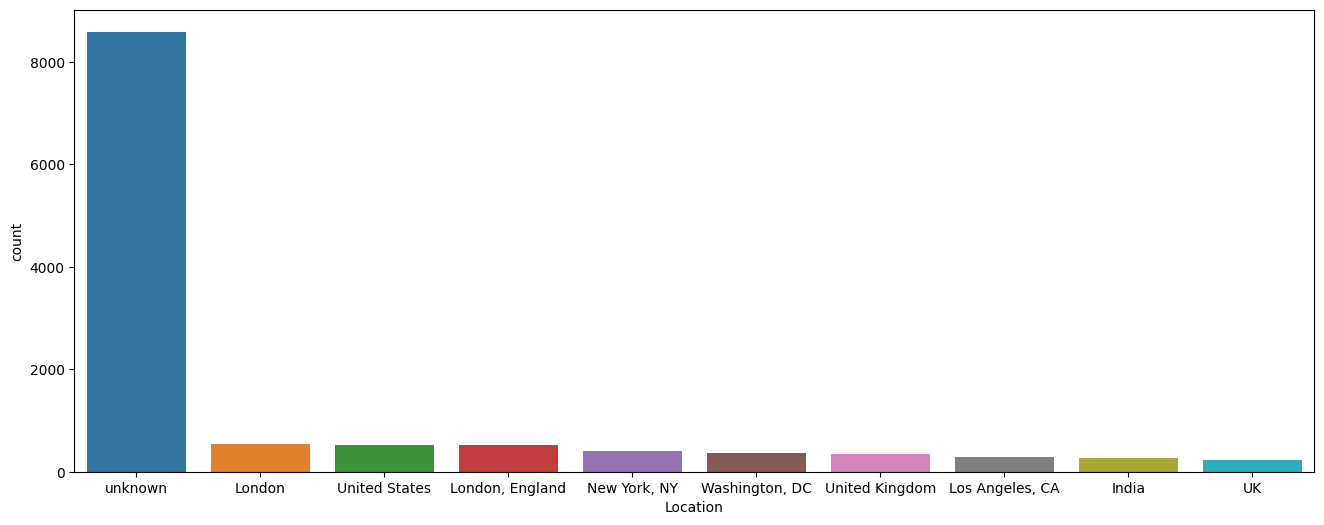

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(data=data[data['Location'].isin(location_top10.index)], x='Location',order=location_top10.index)

### What did you know about your dataset?

There were a lot of Null/Missing values in the "Location" column that had be managed carefully.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.keys()

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


### Variables Description

* **Username**   -  Coded Username
* **ScreenName** -  Coded ScreenName
* **Location**   -  Region of origin
* **TweetAt**    -  Tweet Timing
* **OriginalTweet** - First tweet in the tread
* **Sentiment(Target Variable)** - Sentiment of the tweet

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print("No. of unique values in ",i,"is",data[i].nunique(),".")


No. of unique values in  UserName is 41157 .
No. of unique values in  ScreenName is 41157 .
No. of unique values in  Location is 12221 .
No. of unique values in  TweetAt is 30 .
No. of unique values in  OriginalTweet is 41157 .
No. of unique values in  Sentiment is 5 .


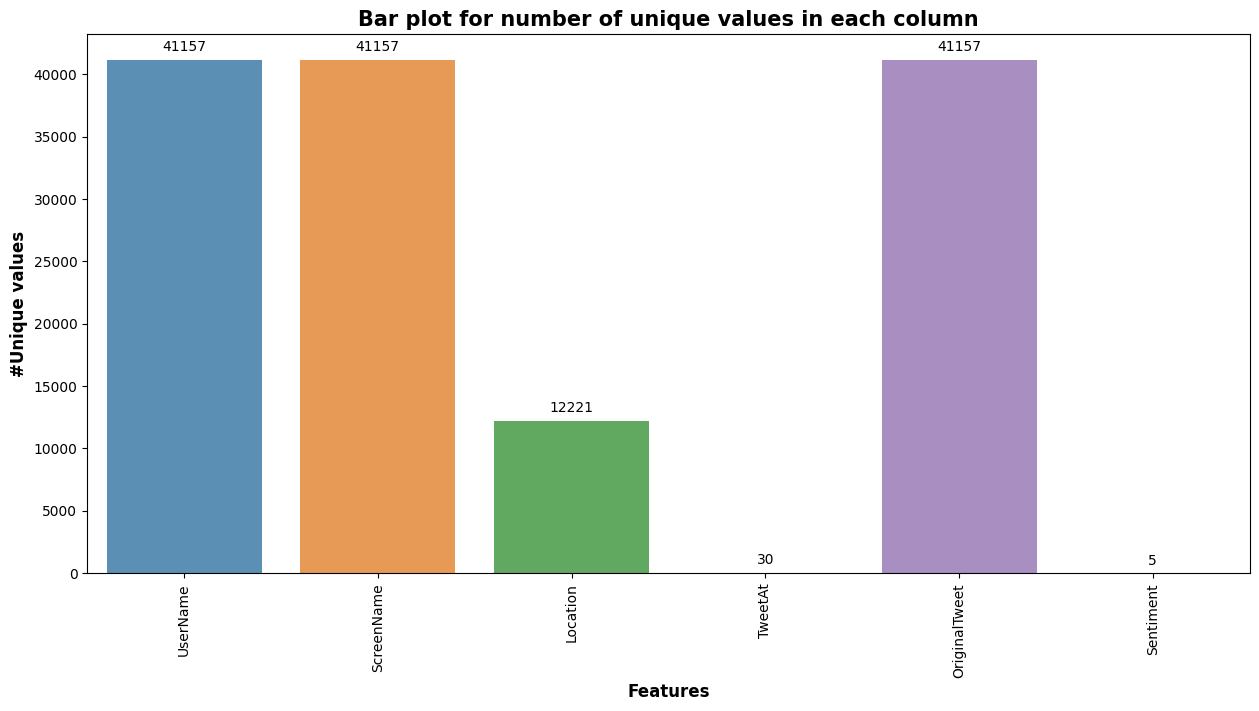

In [ ]:
unique_df=pd.DataFrame()
unique_df['Features']=data.columns
unique=[]
for i in data.columns:
  unique.append(data[i].nunique())
unique_df['Uniques']=unique



f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Countplot of Top 10 Location

In [ ]:
newlocation_top10 = data['Location'].value_counts().sort_values(ascending=False)[1:10]
newlocation_top10

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Name: Location, dtype: int64

<Axes: xlabel='Location', ylabel='count'>

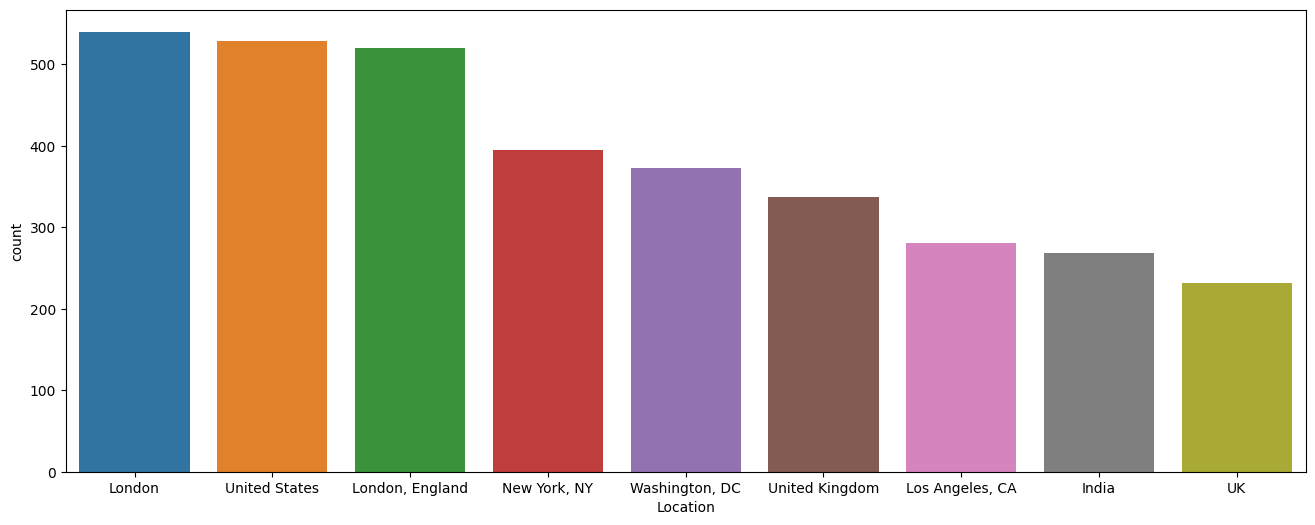

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(16,6))
sns.countplot(data=data[data['Location'].isin(newlocation_top10.index)], x='Location',order=newlocation_top10.index)

##### 1. Why did you pick the specific chart?

The purpose of a bar graph is to convey relational information quickly in a visual manner. The bars display the value for a particular category of data. The vertical axis on the left or right side of the bar graph is called the y-axis. The horizontal axis at the bottom of a bar graph is called the x-axis.

##### 2. What is/are the insight(s) found from the chart?

We see that maximum number of tweets are being done from London,New York and Washington DC



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights will help in creating a positive business impact.

#### Chart - 2 Barplot of Proportion of Sentiments

In [ ]:
sentiment_count = data['Sentiment'].value_counts().reset_index()
sentiment_count.columns=['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


Text(0, 0.5, 'Count')

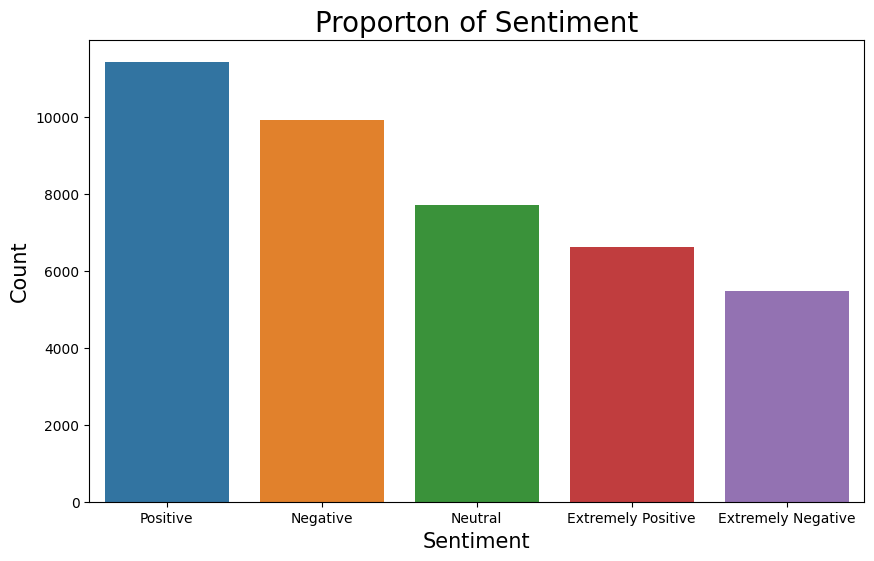

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10,6))
ax = sns.barplot(x="Sentiment", y= 'count', data=sentiment_count)
ax.set_title('Proporton of Sentiment', fontsize=20)
ax.set_xlabel("Sentiment",fontsize=15)
ax.set_ylabel("Count",fontsize=15)

##### 1. Why did you pick the specific chart?

The purpose of a bar graph is to convey relational information quickly in a visual manner. The bars display the value for a particular category of data. The vertical axis on the left or right side of the bar graph is called the y-axis. The horizontal axis at the bottom of a bar graph is called the x-axis.

##### 2. What is/are the insight(s) found from the chart?

Number of "Positive" sentiments are higher than all other sentiments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights will help in creating a positive business impact.

#### Chart - 3 Pie Chart to Display Proportion of sentiments

In [ ]:
# replacing values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
df = data.replace(replace_values)

In [ ]:
sentiment_count1 = df['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

,Sentiment,count
0,Positive,18046
1,Negative,15398
2,Neutral,7713


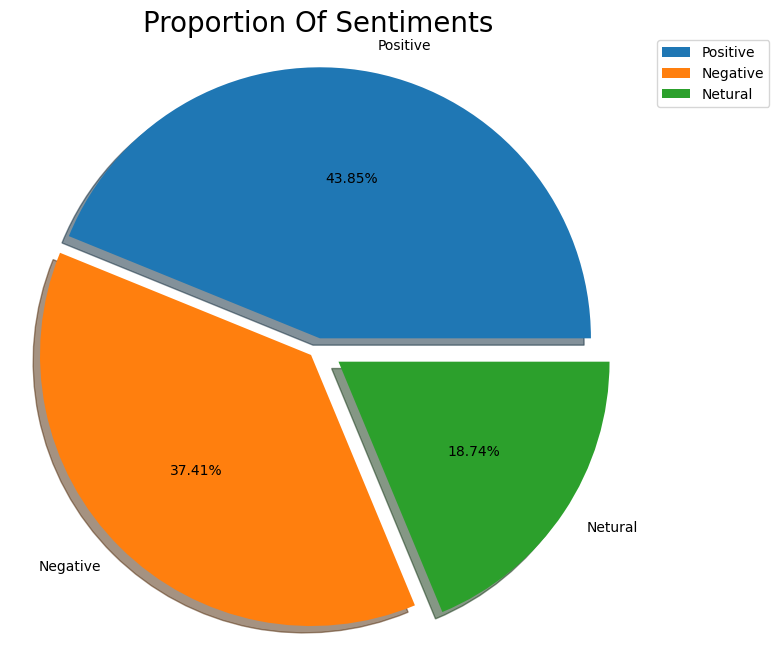

In [ ]:
# Plotting the piechart for Sentiments distribution
sentiment_count1 = df['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,explode=[0.04,0.04,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

##### 1. Why did you pick the specific chart?

Bar graphs are useful for comparing different sets of data within a group while pie charts are useful for comparing sets of data to each other and to the whole.

##### 2. What is/are the insight(s) found from the chart?

Number of "Positive" sentiments are higher than all other sentiments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights will help in creating a positive business impact.

#### Chart - 4 Wordcloud to display most important and frequent tweets.

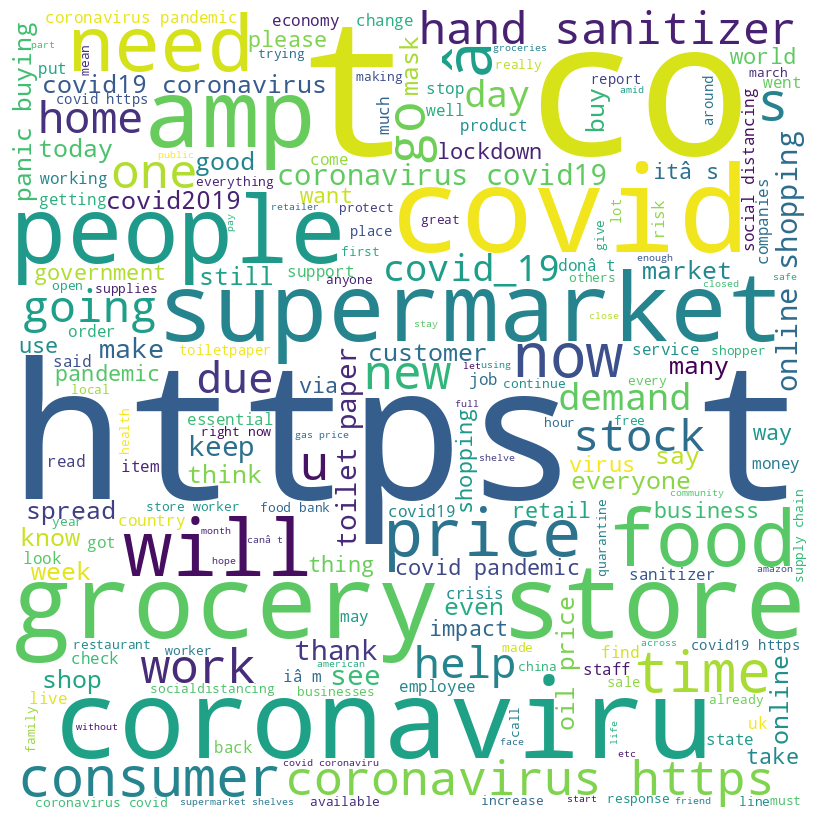

In [ ]:
# Chart - 3 visualization code

# Python program to generate WordCloud
  ## Based on https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in data.OriginalTweet:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()



##### 1. Why did you pick the specific chart?

A word cloud can be a useful tool for quickly visualizing the key themes and ideas in a text.

##### 2. What is/are the insight(s) found from the chart?

Wordcloud to display the number of words and their **Importance** in the 'OriginalTweet' column.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights will help in creating a positive business impact.

#### Chart - 5 Line chart to display counts of tweets across time.

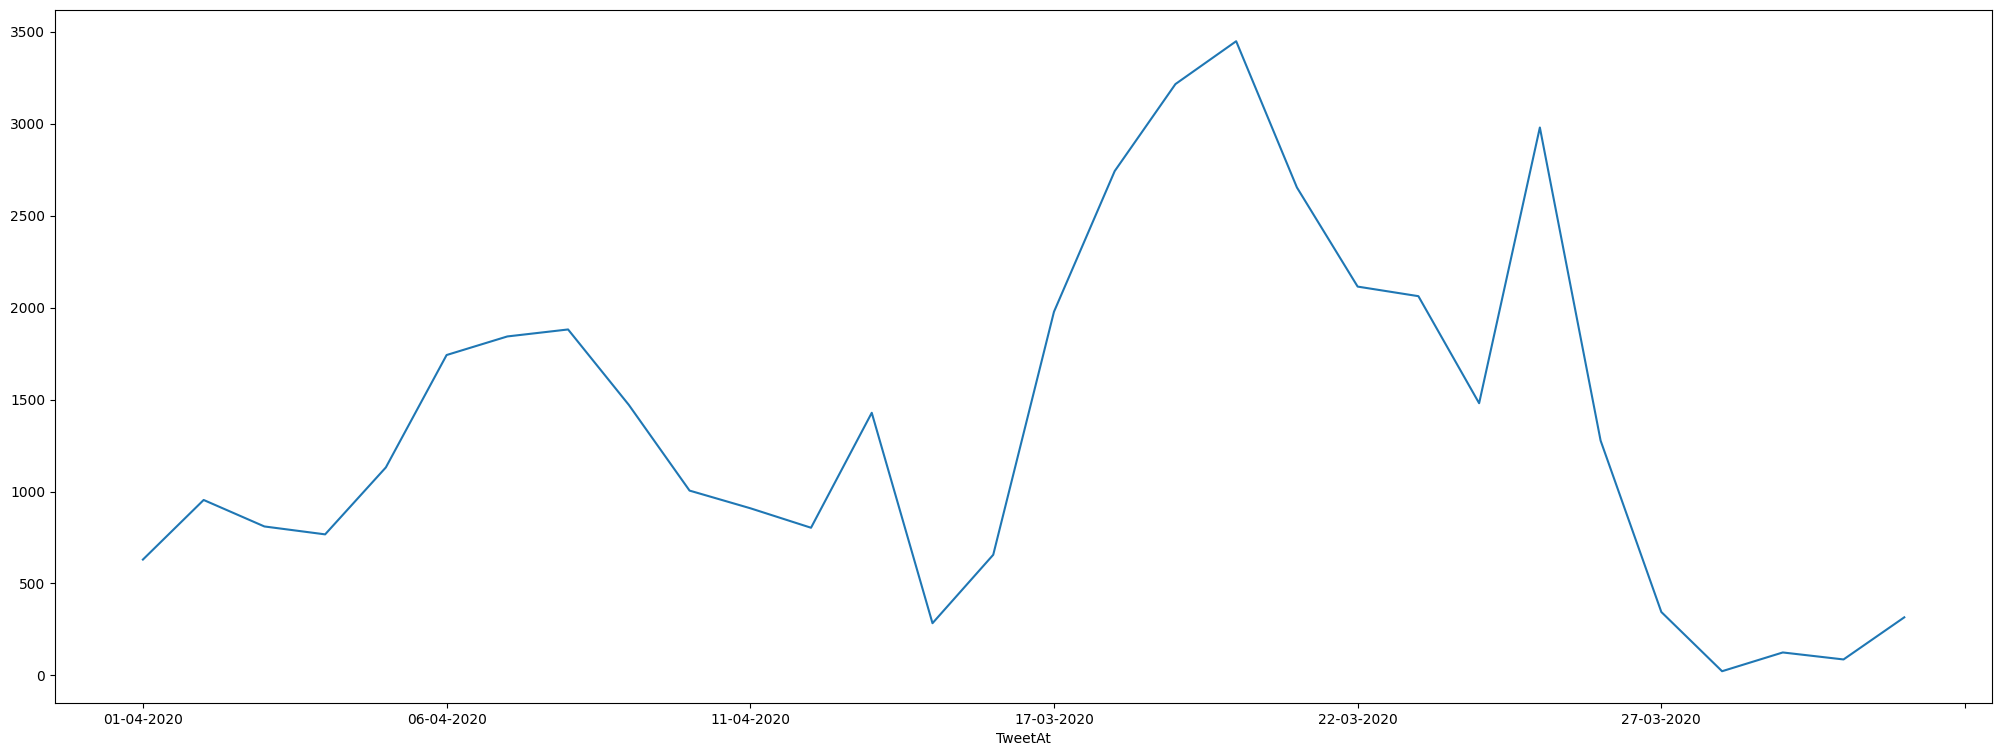

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(25,9))
grp_tweetAt=data.groupby('TweetAt').count()['OriginalTweet'].plot()
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is a type of chart used to show information that changes over time. Line charts are created by plotting a series of several points and connecting them with a straight line. Line charts are used to track changes over short and long periods.

##### 2. What is/are the insight(s) found from the chart?

**Peak count** of tweets was recorded between "**17-03-2020**"-"**22-03-2020**" at approximately **3200+** counts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights will help in creating a positive business impact.

#### Chart - 6 Histogram plot of the lengths of tweets of "OriginalTweet" column.

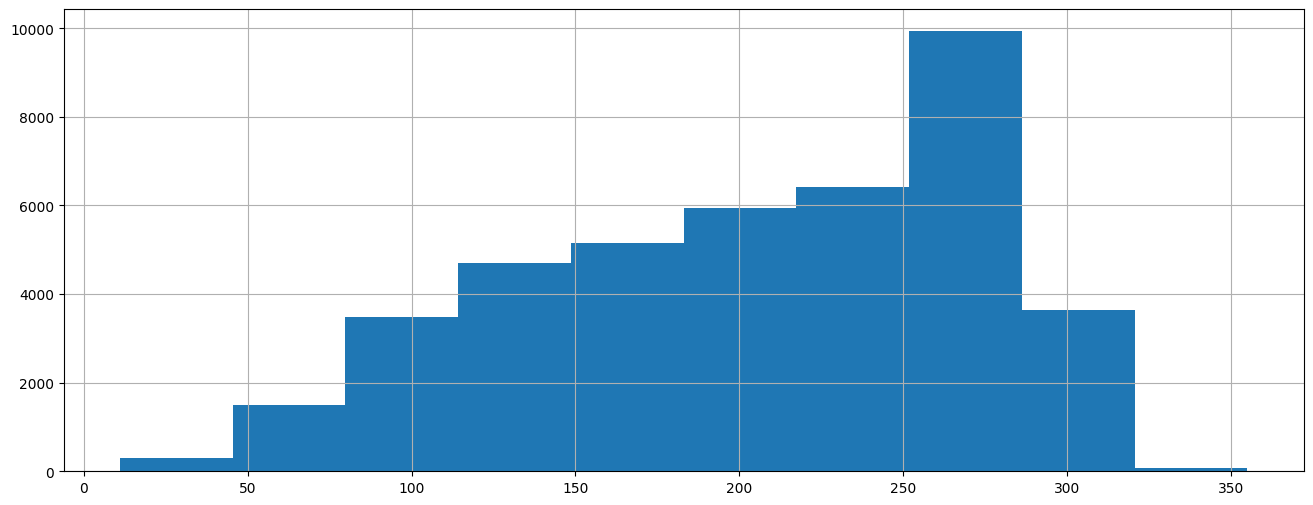

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(16,6))
plt.grid()

plt.hist(data['OriginalTweet'].str.len())
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights will help in creating a positive business impact.

## ***4. Feature Engineering & Textual Data Pre-processing***

 **Textual Data Preprocessing**
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 2. Lower Casing

In [ ]:
# Lower Casing

data["OriginalTweet"] = data["OriginalTweet"].str.lower()
data['OriginalTweet']

0        @menyrbie @phil_gahan @chrisitv https://t.co/i...
1        advice talk to your neighbours family to excha...
2        coronavirus australia: woolworths to give elde...
3        my food stock is not the only one which is emp...
4        me, ready to go at supermarket during the #cov...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when @kameronwild...
41155    is it wrong that the smell of hand sanitizer i...
41156    @tartiicat well new/used rift s are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

#### 3. Removing Punctuations

In [ ]:

data['OriginalTweet'][0]

'@menyrbie @phil_gahan @chrisitv https://t.co/ifz9fan2pa and https://t.co/xx6ghgfzcc and https://t.co/i2nlzdxno8'

In [ ]:
data['OriginalTweet'] = df['OriginalTweet'].str.replace('http\S+|www.\S+', '', case=False)

In [ ]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [ ]:
data["clean_tweets"] = data['OriginalTweet'].apply(remove_punctuations)

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

data['OriginalTweet'] = data['OriginalTweet'].str.replace('http\S+|www.\S+@', '', case=False)



In [ ]:
data['clean_tweets']

0                   MeNyrbie PhilGahan Chrisitv  and  and 
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia Woolworths to give elder...
3        My food stock is not the only one which is emp...
4        Me ready to go at supermarket during the COVID...
                               ...                        
41152    Airline pilots offering to stock supermarket s...
41153    Response to complaint not provided citing COVI...
41154    You know itÂs getting tough when KameronWilds...
41155    Is it wrong that the smell of hand sanitizer i...
41156    TartiiCat Well newused Rift S are going for 70...
Name: clean_tweets, Length: 41157, dtype: object

In [ ]:
data['clean_tweets'] = data['clean_tweets'].str.replace("[^a-zA-Z#//]"," ")
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweets
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv and and,Neutral,MeNyrbie PhilGahan Chrisitv and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...
3,3802,48754,unknown,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,unknown,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the COVID...


#### 5. Removing Stopwords

In [ ]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [ ]:
#Importing Stop-words

nltk.download("stopwords")
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#function to remove stopwords and tokenize
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return (text)

In [ ]:
data['clean_tweets']= data['clean_tweets'].apply(lambda x: remove_stopwords(x))

In [ ]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweets
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv and and,Neutral,"[menyrbie, philgahan, chrisitv]"
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,"[advice, talk, neighbours, family, exchange, p..."
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,"[coronavirus, australia, woolworths, give, eld..."
3,3802,48754,unknown,16-03-2020,My food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, please, dont, panic,..."
4,3803,48755,unknown,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"[ready, go, supermarket, covid, outbreak, im, ..."


#### 6. Stemming

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [ ]:
#function for stemming
def stemming(text):
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [ ]:
data['stemmed'] = data['clean_tweets'].apply(lambda x: stemming(x))

In [ ]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweets,stemmed
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv and and,Neutral,"[menyrbie, philgahan, chrisitv]",menyrbi philgahan chrisitv
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,"[advice, talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,"[coronavirus, australia, woolworths, give, eld...",coronaviru australia woolworth give elderli di...
3,3802,48754,unknown,16-03-2020,My food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, please, dont, panic,...",food stock one empti pleas dont panic enough f...
4,3803,48755,unknown,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"[ready, go, supermarket, covid, outbreak, im, ...",readi go supermarket covid outbreak im paranoi...


###7. Lemmatizing

In [ ]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
data['lemmed'] = data['clean_tweets'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

In [ ]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweets,stemmed,lemmed
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv and and,Neutral,"[menyrbie, philgahan, chrisitv]",menyrbi philgahan chrisitv,"[menyrbie, philgahan, chrisitv]"
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,"[advice, talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,"[advice, talk, neighbour, family, exchange, ph..."
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,"[coronavirus, australia, woolworths, give, eld...",coronaviru australia woolworth give elderli di...,"[coronavirus, australia, woolworth, give, elde..."
3,3802,48754,unknown,16-03-2020,My food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, please, dont, panic,...",food stock one empti pleas dont panic enough f...,"[food, stock, one, empty, please, dont, panic,..."
4,3803,48755,unknown,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"[ready, go, supermarket, covid, outbreak, im, ...",readi go supermarket covid outbreak im paranoi...,"[ready, go, supermarket, covid, outbreak, im, ..."


### 8. Feature Manipulation & Selection

In [ ]:
# Manipulating Features to minimize feature correlation and create new features
# replacing values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
data = data.replace(replace_values)

##### What all feature selection methods have you used  and why?

I have Reduced classes "Extremely Negative" and "Extremely Positive" by converting them into "Negative" and "Positive" classes which were already existing to avoid problems due to Multi-Class classification.

##### Which all features you found important and why?

Since this an NLP problem, only the Target Variable and Textual data column(OriginaTweet) are important.

### 9. Data Splitting

In [ ]:
#Assigning dependent and independent features
X= data['lemmed']
y=data['Sentiment']

In [ ]:
# Applying Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=10)

In [ ]:
#checking shape of splitted data
print(X_train.shape)
y_test.shape

(28809,)


(12348,)

In [ ]:
#checking splitted data
print(X_train.head())
y_train.head()

23805    [target, pull, back, store, remodels, opening,...
31828    [breaking, msf, call, patent, profiteering, dr...
24504    [coronavirus, spread, world, leader, get, toug...
17281    [store, shelf, empty, people, selling, certain...
11488    [fresco, u, normal, night, final, reduction, n...
Name: lemmed, dtype: object


23805     Neutral
31828    Negative
24504    Negative
17281    Positive
11488     Neutral
Name: Sentiment, dtype: object

## ***5. ML Model Implementation Based on --> Count Vectorizer***

###**Model 1 -->   Logistic Regression Count Vectoriser Method with Gridsearch CV**

In [ ]:
#Model libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

#### **Count Vectorization (Bag of Words)**

In [ ]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
# Bag of words
cv=CountVectorizer(binary=False,max_df=1.0,min_df=5,ngram_range=(1,2))
cv_X_train=cv.fit_transform(X_train.astype(str).str.strip())


In [ ]:
cv_X_test=cv.transform(X_test.astype(str).str.strip())


In [ ]:
#Initalizing the model
lr_cv = LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

#Hyperparameter tuning by GridserchCV
logreg_Gcv=GridSearchCV(lr_cv,parameters,cv=15)

#fitting the data to model
logreg_Gcv.fit(cv_X_train,y_train)

GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [ ]:
#predicted values
pred_lr_cv = logreg_Gcv.predict(cv_X_test)

In [ ]:
pred_lr_cv

array(['Positive', 'Positive', 'Neutral', ..., 'Neutral', 'Negative',
       'Positive'], dtype=object)

In [ ]:
#Accuracy
accuracy_lr_cv = accuracy_score(y_test,pred_lr_cv)
print("Accuracy :",(accuracy_lr_cv))

Accuracy : 0.7828798185941043


In [ ]:
# Classification report of Performance metrics
label=['neutral','positive','negative']
print(classification_report(y_test,pred_lr_cv))

              precision    recall  f1-score   support

    Negative       0.79      0.79      0.79      4620
     Neutral       0.68      0.68      0.68      2314
    Positive       0.82      0.83      0.82      5414

    accuracy                           0.78     12348
   macro avg       0.76      0.76      0.76     12348
weighted avg       0.78      0.78      0.78     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

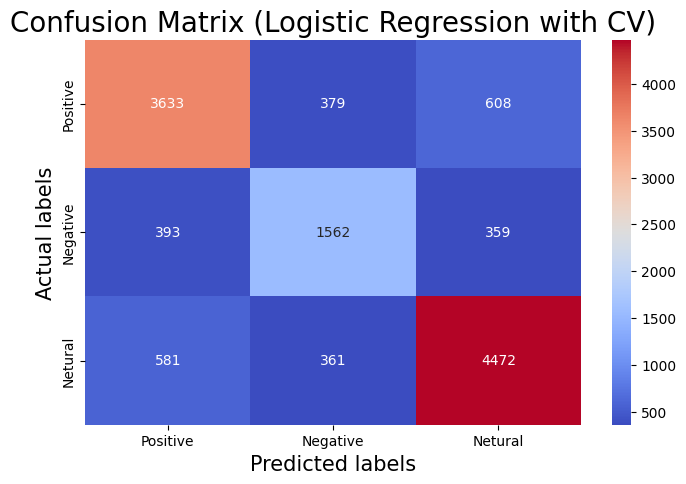

In [ ]:
#Plotting Confussion matrix
cf1= (confusion_matrix(y_test,pred_lr_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1, annot=True, fmt=".0f",ax = ax, cmap='coolwarm')

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regression with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **Model 2 --> Decision Tree Classifier with CV**

In [ ]:
# Initializing model
dt_cv=DecisionTreeClassifier()

#fitting the data to model
dt_cv.fit(cv_X_train,y_train)

#predicted values
pred_dt_cv=dt_cv.predict(cv_X_test)

In [ ]:
pred_dt_cv

array(['Positive', 'Positive', 'Positive', ..., 'Neutral', 'Neutral',
       'Positive'], dtype=object)

In [ ]:
# Accuracy
cv_score_dt_cv= cross_val_score(dt_cv,cv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_cv)))

Accuracy: 0.6920754289772744


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_cv))

              precision    recall  f1-score   support

    Negative       0.69      0.68      0.68      4620
     Neutral       0.61      0.66      0.64      2314
    Positive       0.75      0.74      0.74      5414

    accuracy                           0.70     12348
   macro avg       0.68      0.69      0.69     12348
weighted avg       0.70      0.70      0.70     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

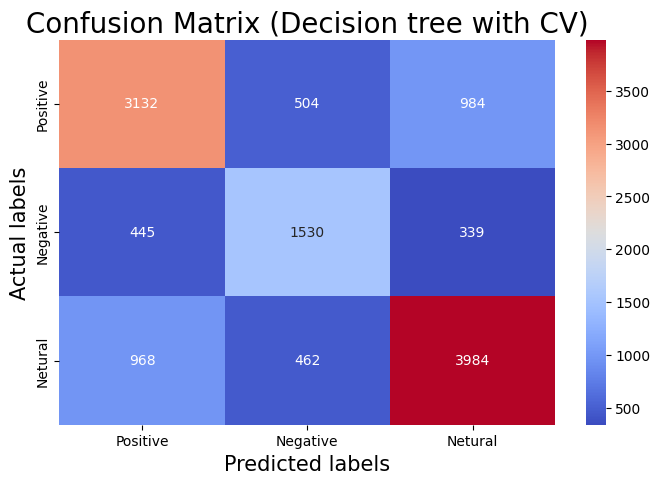

In [ ]:
#Plotting Confussion matrix
cf2= (confusion_matrix(y_test,pred_dt_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2, annot=True, fmt=".0f",ax = ax, cmap='coolwarm')

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision tree with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### **Observation** :
**This model gives an accuracy score of 68.80% which implies that our model is performing well.**

###  **Model 3 --> RANDOM FOREST with CV**

In [ ]:
from sklearn.ensemble import RandomForestClassifier



In [ ]:
# Initializing model
rf_cv = RandomForestClassifier()

#fitting the data to model
rf_cv.fit(cv_X_train,y_train)

#predicted values
pred_dt_rf = rf_cv.predict(cv_X_test)

In [ ]:
pred_dt_rf

array(['Positive', 'Positive', 'Positive', ..., 'Neutral', 'Neutral',
       'Positive'], dtype=object)

In [ ]:
# Accuracy
cv_score_rf_cv= cross_val_score(rf_cv,cv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_rf_cv)))

Accuracy: 0.7437604809078702


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_rf))

              precision    recall  f1-score   support

    Negative       0.77      0.73      0.75      4620
     Neutral       0.68      0.72      0.70      2314
    Positive       0.79      0.80      0.79      5414

    accuracy                           0.76     12348
   macro avg       0.74      0.75      0.75     12348
weighted avg       0.76      0.76      0.76     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

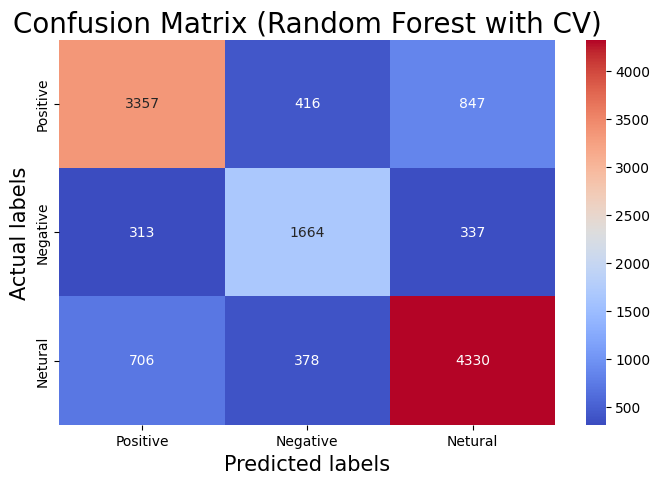

In [ ]:
#Plotting Confussion matrix
cf2= (confusion_matrix(y_test,pred_dt_rf))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2, annot=True, fmt=".0f",ax = ax, cmap='coolwarm')

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Random Forest with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### **Observation** :
**This model gives an accuracy score of 74% which implies that our model is performing well.**

### **Model 4 --> XG-Boost classifier with CV**

In [ ]:
#Label Encoding required for XGBoost Classifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [ ]:
# Initializing model
xgb_cv=XGBClassifier()

#fitting the data to model
xgb_cv.fit(cv_X_train,y_train)

#predicted values
pred_xgb_cv=xgb_cv.predict(cv_X_test)

In [ ]:
pred_xgb_cv

array([2, 2, 2, ..., 1, 1, 2])

In [ ]:
#Inverse transformation of Encoded Labels data
pred_xgb_cv1 = le.inverse_transform(pred_xgb_cv)

In [ ]:
# Accuracy
cv_score_xgb_cv= cross_val_score(xgb_cv,cv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_xgb_cv)))

Accuracy: 0.76583700463222


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_xgb_cv1))

              precision    recall  f1-score   support

    Negative       0.81      0.74      0.77      4620
     Neutral       0.64      0.79      0.71      2314
    Positive       0.82      0.80      0.81      5414

    accuracy                           0.78     12348
   macro avg       0.76      0.78      0.76     12348
weighted avg       0.78      0.78      0.78     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

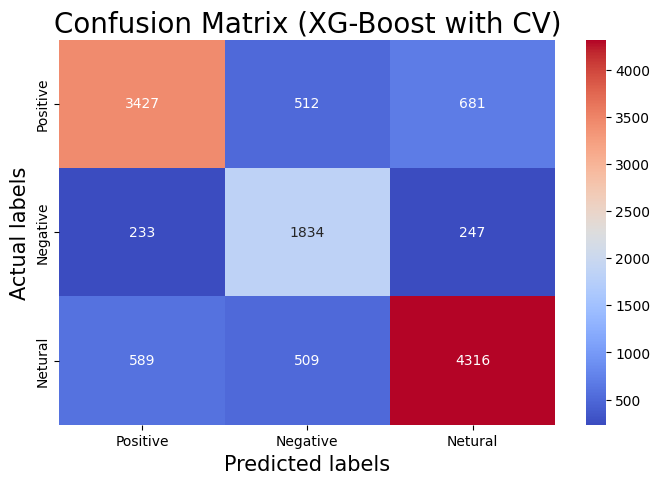

In [ ]:
#Plotting Confussion matrix
cf3= (confusion_matrix(y_test,pred_xgb_cv1))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf3, annot=True, fmt=".0f",ax = ax, cmap='coolwarm')

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (XG-Boost with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### **Observation** :
**This model gives an accuracy score of 76% which implies that our model is performing well.**

#### **Model 5 --> SVM** with **CV**

In [ ]:
# Initializing model
svm_cv = SVC()

#fitting the data to model
svm_cv.fit(cv_X_train,y_train)

#prediction
pred_svm_cv = svm_cv.predict(cv_X_test)

In [ ]:
pred_svm_cv

array([2, 2, 1, ..., 1, 1, 2])

In [ ]:
#Inverse transformation of Encoded Labels data
pred_svm_cv1 = le.inverse_transform(pred_svm_cv)

In [ ]:
# Accuracy
accuracy_svc = accuracy_score(y_test,pred_svm_cv1)
print("Accuracy :",(accuracy_svc))

Accuracy : 0.7607709750566893


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_cv1))

              precision    recall  f1-score   support

    Negative       0.77      0.75      0.76      4620
     Neutral       0.65      0.66      0.66      2314
    Positive       0.80      0.81      0.80      5414

    accuracy                           0.76     12348
   macro avg       0.74      0.74      0.74     12348
weighted avg       0.76      0.76      0.76     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

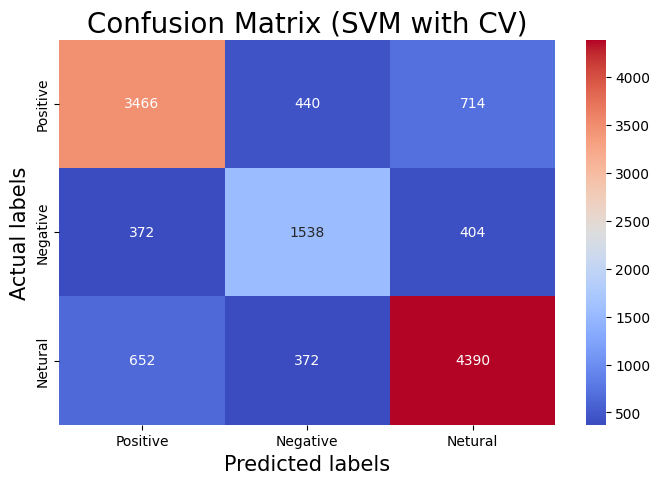

In [ ]:
#Plotting Confussion matrix
cf5= (confusion_matrix(y_test,pred_svm_cv1))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf5, annot=True, fmt=".0f",ax = ax,cmap='coolwarm')

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (SVM with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

##### **Observation** :
**This model gives an accuracy score of 76% which implies that our model is performing well.**

## ***6. ML Model Implementation Based on --> Tf-idf Vectorizer***

###**Model 1 --> LOGISTIC REGRESSION**

In [ ]:
# TF-IDF
tv=TfidfVectorizer(use_idf=True,max_df=1.0,min_df=5,ngram_range=(1,2),sublinear_tf=True)
tv_X_train=tv.fit_transform(X_train.astype(str).str.strip())
tv_X_test=tv.transform(X_test.astype(str).str.strip())

In [ ]:
# Initializing model
lr_tv=LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

#Hyperparameter tuning by GridserchCV
lr_tv_Gcv=GridSearchCV(lr_tv,parameters,cv=5)

#fitting the data to model
lr_tv_Gcv.fit(tv_X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [ ]:
#predicted values
pred_lr_tv_Gcv = lr_tv_Gcv.predict(tv_X_test)

In [ ]:
pred_lr_tv_Gcv

array([2, 0, 2, ..., 2, 0, 2])

In [ ]:
#Inverse transformation of Encoded Labels data
pred_lr_tv_Gcv1 = le.inverse_transform(pred_lr_tv_Gcv)

In [ ]:
#Accuracy
accuracy_lr_Gcv = accuracy_score(y_test,pred_lr_tv_Gcv1)
print("Accuracy :",(accuracy_lr_Gcv))

Accuracy : 0.7738095238095238


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_lr_tv_Gcv1))

              precision    recall  f1-score   support

    Negative       0.78      0.78      0.78      4620
     Neutral       0.67      0.62      0.64      2314
    Positive       0.81      0.83      0.82      5414

    accuracy                           0.77     12348
   macro avg       0.75      0.74      0.75     12348
weighted avg       0.77      0.77      0.77     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

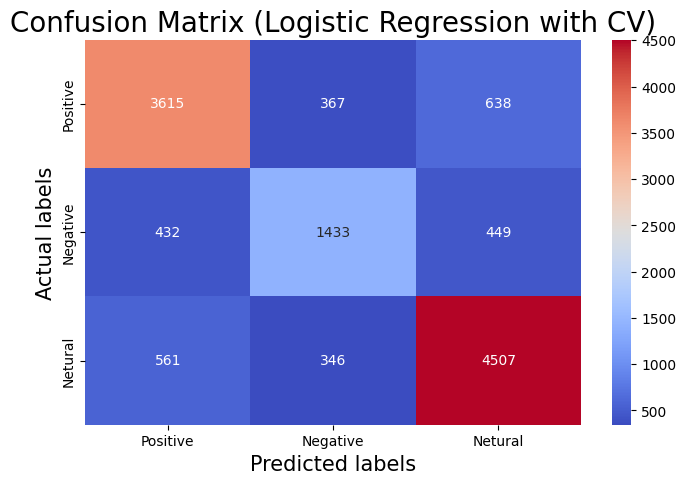

In [ ]:
#Plotting Confussion matrix
cf1= (confusion_matrix(y_test,pred_lr_tv_Gcv1))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1, annot=True, fmt=".0f",ax = ax,cmap='coolwarm')

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regression with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### **Observation** :
**This model gives an accuracy score of 77% which implies that our model is performing well.**

### **Model 2 --> Decision tree classifier** with **TF/IDF**

In [ ]:
# Initializing model
dt_tv=DecisionTreeClassifier()

#fitting the data to model
dt_tv.fit(tv_X_train,y_train)

#prediction
pred_dt_tv=dt_tv.predict(tv_X_test)

In [ ]:
pred_dt_tv

array([2, 2, 1, ..., 1, 2, 0])

In [ ]:
#Inverse transformation of Encoded Labels data
pred_dt_tv1 = le.inverse_transform(pred_dt_tv)

In [ ]:
# Accuracy
cv_score_dt_tv= cross_val_score(dt_tv,tv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_tv)))

Accuracy: 0.6047415562435197


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_tv1))

              precision    recall  f1-score   support

    Negative       0.62      0.61      0.62      4620
     Neutral       0.48      0.54      0.51      2314
    Positive       0.68      0.66      0.67      5414

    accuracy                           0.62     12348
   macro avg       0.60      0.60      0.60     12348
weighted avg       0.62      0.62      0.62     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

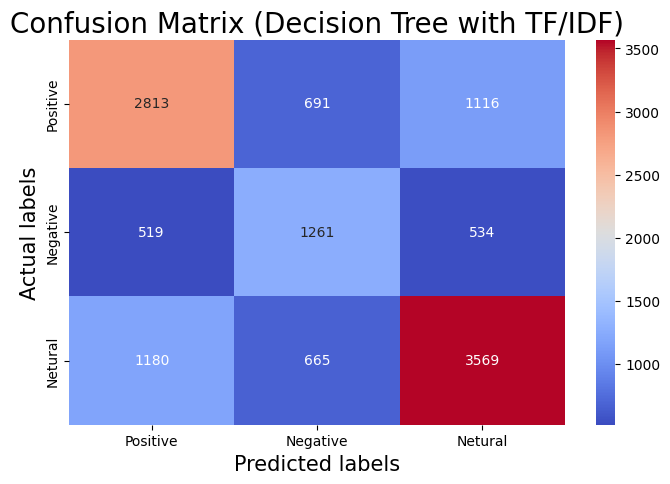

In [ ]:
#Plotting Confussion matrix
cf2a= (confusion_matrix(y_test,pred_dt_tv1))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2a, annot=True, fmt=".0f",ax = ax,cmap='coolwarm')

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision Tree with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### **Observation** :
**This model gives an accuracy score of 60% which implies that our model is performing well.**

### **Model 3 --> XG-Boost classifier** with **TF/IDF**

In [ ]:
# Initializing model
xgb_tv=DecisionTreeClassifier()

#fitting the data to model
xgb_tv.fit(tv_X_train,y_train)

#prediction
pred_xgb_tv=xgb_tv.predict(tv_X_test)

In [ ]:
pred_xgb_tv

array([2, 2, 1, ..., 1, 2, 0])

In [ ]:
# Accuracy
cv_score_xgb_tv= cross_val_score(xgb_tv,tv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_xgb_tv)))

Accuracy: 0.6055053667610567


In [ ]:
#Inverse transformation of Encoded Labels data
pred_xgb_tv1 = le.inverse_transform(pred_xgb_tv)

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_xgb_tv1))

              precision    recall  f1-score   support

    Negative       0.62      0.61      0.62      4620
     Neutral       0.47      0.55      0.51      2314
    Positive       0.69      0.66      0.67      5414

    accuracy                           0.62     12348
   macro avg       0.60      0.60      0.60     12348
weighted avg       0.62      0.62      0.62     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

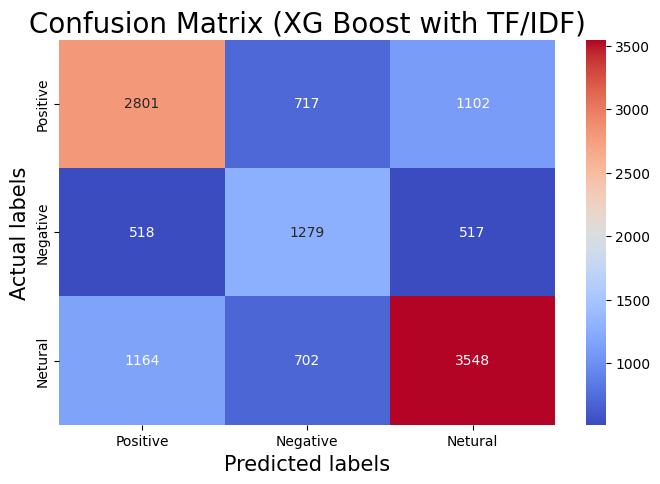

In [ ]:
#Plotting Confussion matrix
cf3a= (confusion_matrix(y_test,pred_xgb_tv1))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf3a, annot=True, fmt=".0f",ax = ax, cmap='coolwarm')

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (XG Boost with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### **Observation** :
**This model gives an accuracy score of 60% which implies that our model is performing well.**

### **Model 4 --> Random Forest classifier** with **TF/IDF**

In [ ]:
# Initializing model
rf_tv = RandomForestClassifier()

#fitting the data to model
rf_tv.fit(tv_X_train,y_train)

#predicted values
pred_tv_rf = rf_tv.predict(tv_X_test)

In [ ]:
pred_tv_rf

array([2, 0, 0, ..., 1, 1, 2])

In [ ]:
#Inverse transformation of Encoded Labels data
pred_tv_rf1 = le.inverse_transform(pred_tv_rf)

In [ ]:
# Accuracy
cv_score_rf_tv= cross_val_score(rf_tv,tv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_xgb_tv)))

Accuracy: 0.6055053667610567


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_tv_rf1))

              precision    recall  f1-score   support

    Negative       0.75      0.71      0.73      4620
     Neutral       0.63      0.63      0.63      2314
    Positive       0.75      0.79      0.77      5414

    accuracy                           0.73     12348
   macro avg       0.71      0.71      0.71     12348
weighted avg       0.73      0.73      0.73     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

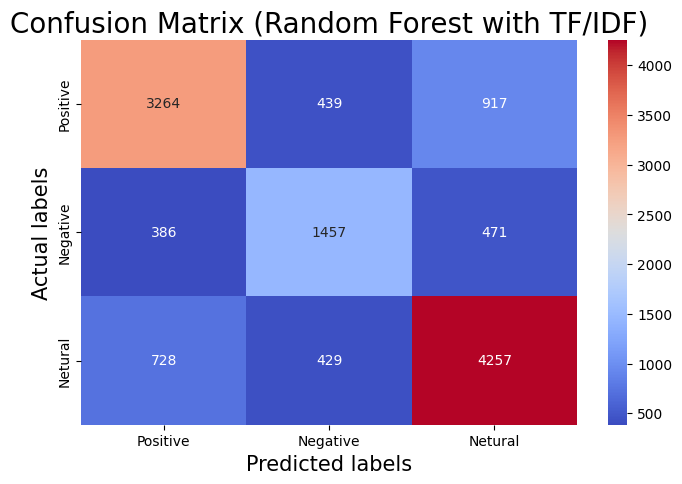

In [ ]:
#Plotting Confussion matrix
cf3a= (confusion_matrix(y_test,pred_tv_rf1))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf3a, annot=True, fmt=".0f",ax = ax, cmap='coolwarm')

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Random Forest with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### **Observation** :
**This model gives an accuracy score of 60% which implies that our model is performing well.**

### **Model 5 -->** **SVM** with **TF/ID**

In [ ]:
# Initializing model
svm_tv = SVC()

#fitting the data to model
svm_tv.fit(tv_X_train,y_train)

#prediction
pred_svm_tv = svm_tv.predict(tv_X_test)

In [ ]:
pred_svm_tv

array([2, 2, 0, ..., 2, 0, 2])

In [ ]:
#Inverse transformation of Encoded Labels data
pred_svm_tv1 = le.inverse_transform(pred_svm_tv)

In [ ]:
# Accuracy
accuracy_svm_tv = accuracy_score(y_test,pred_svm_tv1)
print("Accuracy :",(accuracy_svm_tv))

Accuracy : 0.7657920310981535


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_tv1))

              precision    recall  f1-score   support

    Negative       0.76      0.80      0.78      4620
     Neutral       0.73      0.52      0.61      2314
    Positive       0.78      0.84      0.81      5414

    accuracy                           0.77     12348
   macro avg       0.76      0.72      0.73     12348
weighted avg       0.76      0.77      0.76     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

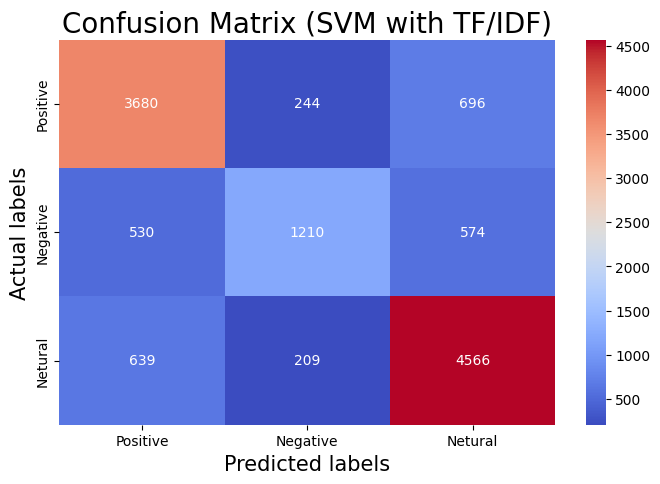

In [ ]:
#Plotting Confussion matrix
cf5a= (confusion_matrix(y_test,pred_svm_tv1))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf5a, annot=True, fmt=".0f",ax = ax,cmap='coolwarm')

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (SVM with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### **Observation** :
**This model gives an accuracy score of 76% which implies that our model is performing well.**

##**7. Model Comparison**

In [ ]:
# Model's acurracy Score Comparision

acurracy = {'Model':  ['Logistic Regression Classifier', 'Decision Tree Classifier','XG-Boost Classifier','Random Forest Classifier','Support-Vector-Machine Classifier'],
        'Count Vector':  [accuracy_lr_cv,np.mean(cv_score_dt_cv),np.mean(cv_score_xgb_cv),np.mean(cv_score_rf_cv),accuracy_svc],
        'Tf/idf Vector': [accuracy_lr_Gcv,np.mean(cv_score_dt_tv),np.mean(cv_score_xgb_tv),np.mean(cv_score_rf_cv),accuracy_svm_tv]}

cv_score_table= pd.DataFrame (acurracy, columns = ['Model','Count Vector','Tf/idf Vector'])

cv_score_table

,Model,Count Vector,Tf/idf Vector
0,Logistic Regression Classifier,0.782880,0.773810
1,Decision Tree Classifier,0.692075,0.604742
2,XG-Boost Classifier,0.765837,0.605505
3,Random Forest Classifier,0.743760,0.743760
4,Support-Vector-Machine Classifier,0.760771,0.765792


# **Conclusion**

* Original Dataset contains 6 columns and 41157 rows.  
* Location column contains approx **20% of Null values**. so, I have handled carefully the  NaN values to avoid data loss.
* The **null values** were replaced with "**unknown**" string.  
* In order to analyse the data we required only two columns "**OriginalTweet**" &
   "**Sentiment**".  
* There are five types of sentiments- Extremely Negative, Negative, Neutral,
   Positive and Extremely Positive.  
* All tweets data collected from the months of **March** and **April** in year
   2020.
* Most of the tweets came from **London** followed by **U.S**.  
* I applied 5 different machine learing models namely, Logistic Regression
   with Grid Search CV , Desision Tree Classifier, XG Boost, Random Forest, SVM Classifier for both **Count Vectorization** And **TF IDF Vectorisation** techniques.
* I conclude that the machine is generating best results for **Logistic
    Regression**  with **Grid Search CV** model with and Accuracy score of **78.28%** and **77.43%** respectively for **Count vectorizer** and **TF/idf Vectorizer**, followed by **SVM**.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***